# Day 6: RCC

## Logistics
Today we are going to be learning about and using UChicago's computing cluster, called **Midway**. 

I am using this jupyter notebook only for notes, we will not be running anything, so all cells will be markdown cells. 

So go ahead and pull today's notebook just to have as a reference, or you can just follow along on my screen.

I think it's really importnat not to just know how to autopilot use things, but to really understand how they work. So this is going to be maybe more lecture than other days, but the goal is that you'll come away understanding *how* computing clusters work in addition to being able to use them.

## Outline
1. What is an RCC? What is Midway?                        
2. Getting connected to Midway                            
3. Data storage and data transfer
4. Supercomputer basics, how midway works
5. Midway for research (jobs/software)                                   

## Introduction to Midway

RCC stands for Research Computing Center, and it is UChicago's high-performance computing hub. Not only does the RCC actually manage the computing cluster, but they also provide support such as software installation, workshops, one-on-one consulting and much more. Basically, they handle all of the computing and storage systems that we the researchers can use for our work.

The computing cluster is called Midway. As the cluster is updated and added to, they push out new versions. So currently most of us use Midway2, but Midway3 does exist and will be more widely adopted soon. A computing cluster (or HPC cluster) is quite literally a bunch of big computers together in a room. So somewhere nearby we have a room that looks something like this.

Each computing server in this giant stack is called a **node**, and all the nodes are connected on a network. When you access this network, you can use the computers to ..compute! We'll talk more about this later.

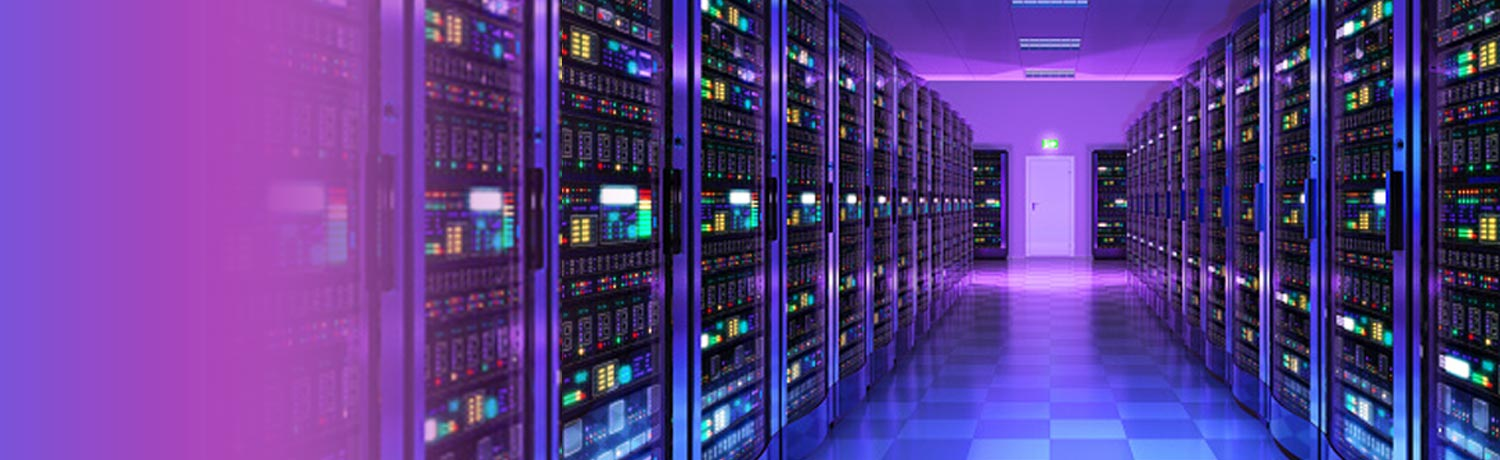

You as a student are able to use Midway through your PI's account (if your PI does any computing, they definitely have an account). Some PI's have their own lab cluster, but I'd say most use Midway because it's free for them. They just have to apply for an allocation of Service Units, which their students can then use.

For this bootcamp, we have given you access to Midway through our bootcamps' 'PI' account. This account will be deactivated after the bootcamp-- meaning that although you will still have your RCC account, you'll need to become connected to a PI's account before you can use it again.

### The RCC website

Spend a few minutes poking around the RCC website to see what information they host.

https://rcc.uchicago.edu/

## Getting Connected

Before we talk more about how the cluster works, we are going to get connected to midway. There are two main ways to connect to midway: ssh and ThinLink. We're going to be using ssh today (and that's what I use exclusively), but I'll briefly introduce ThinLinc.

### Connecting with ssh 

ssh stands for Secure Shell, and it's a protocol that provides secure command-line access to remote computing resources such as midway. Basically, it's how you connect your local computer to the computing cluster to be able to use it. You'll need your CNET id username and password. 

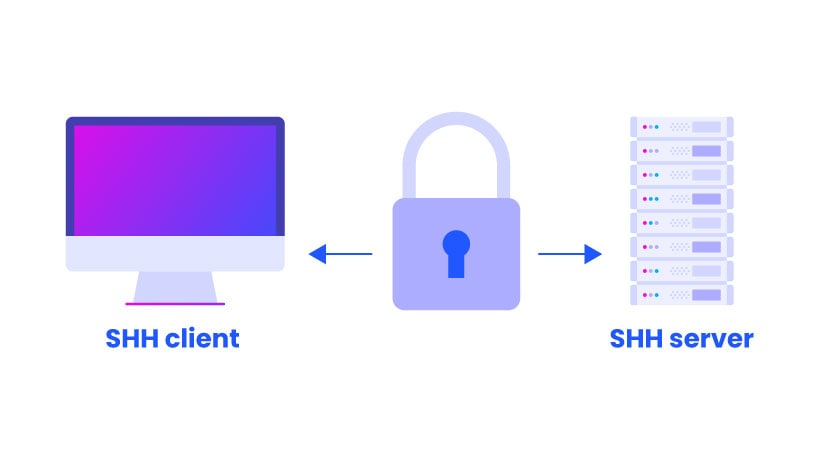

### ssh with Mac

To log into Midway2 from a Linux or MAc, open a terminal and at the command line enter:

`ssh <CNetID>@midway2.rcc.uchicago.edu`

Provide your CNetID password when prompted, and then complete the Duo two-factor authentication.

### ssh with Windows

If you have a recent enough version of Windows, you will have ssh enabeled from the Powershell by default. All other Windows users will need to first download an ssh client to interact with the remote Unix command line. We have asked Windows users with old versions to download **MobaXterm**, which you can use to connect to midway with the following instructions.

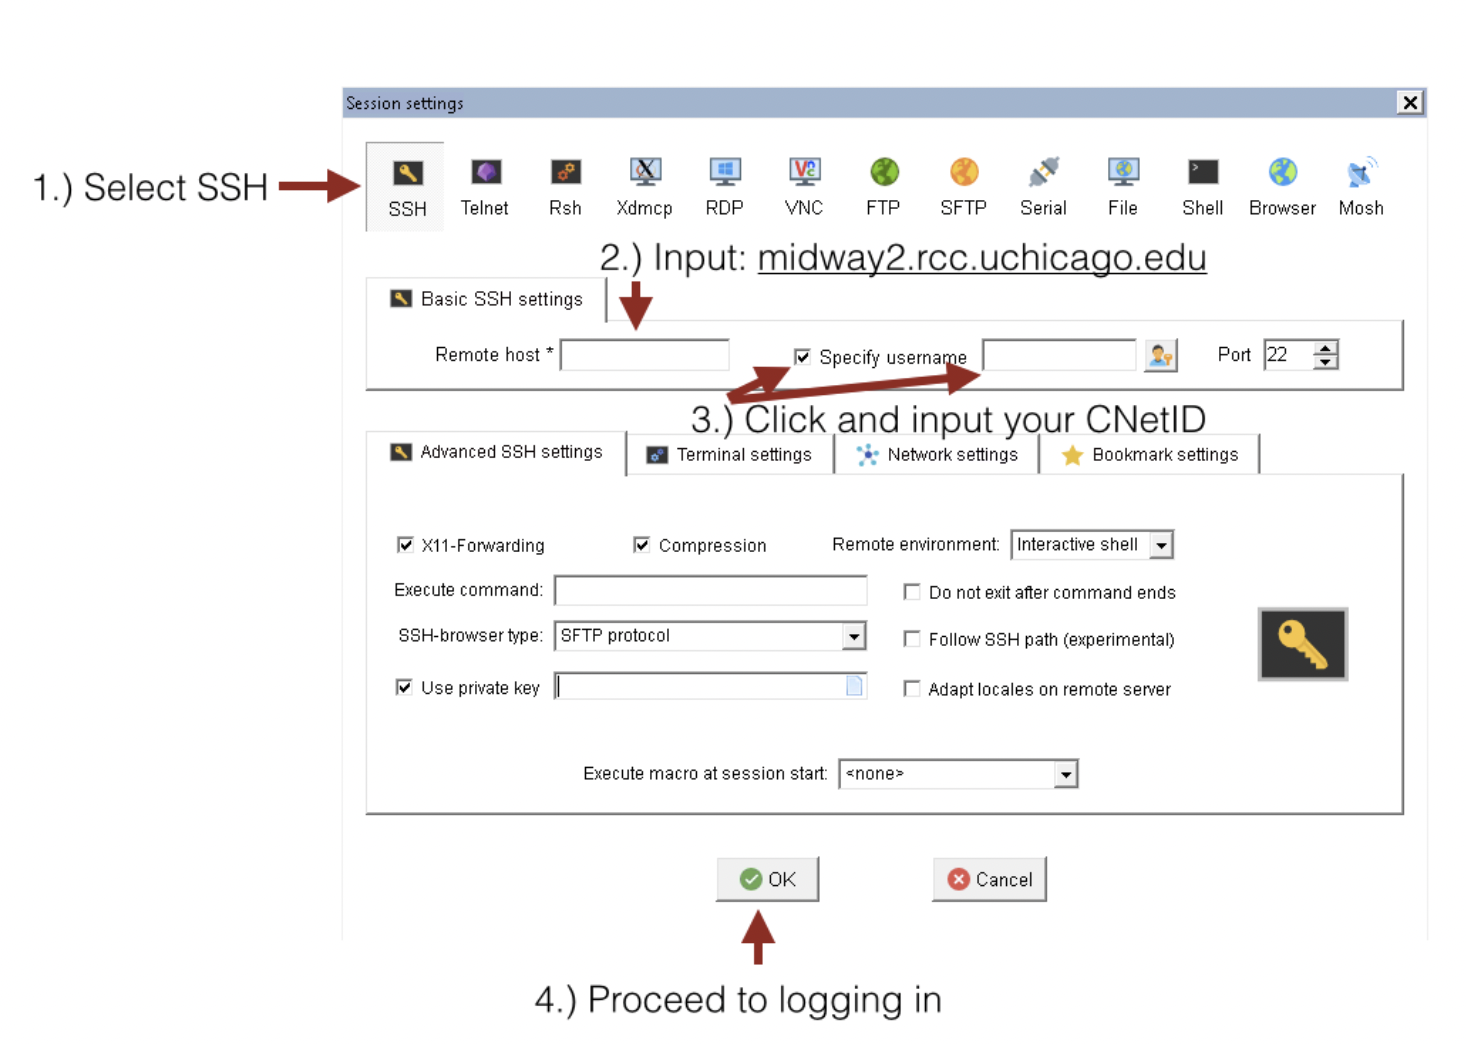

You will then need to complete the DUO two-factor authentication.

### ThinLinc

The other way to connect, ThinLink, allows GUI access (GUI = graphical user interface). So if you're doing things that require a GUI, use this. Instructions can be found on the User Guide on the website.

## Check in 2: have you successfully ssh'd into midway?

### Now that we're in, let's poke around a little bit

Let's try out some of the basic unix commands to see what's around midway.

`pwd`\
`ls`\
`cd ..` `ls`\
`cd someoneelsesuser`\
`cd youruser`

You'll notice that your user indicates that you are in something called login2 (or login1). That's super important, and I'm going to take a few minutes to talk about what that means.

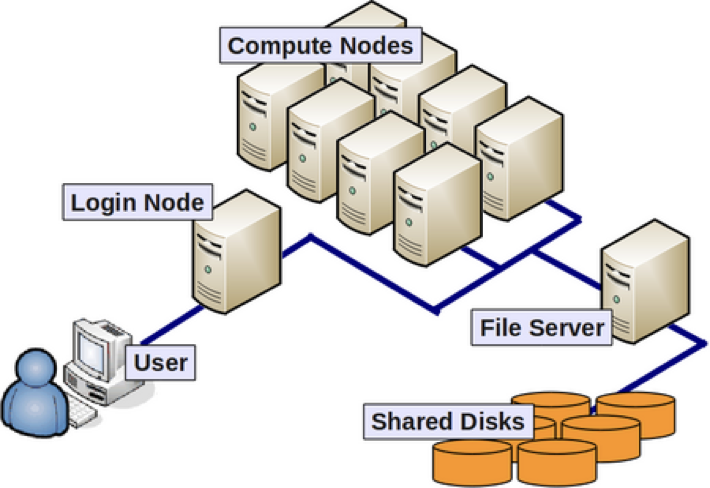

This graphic shows you the basic layout of a high-performance computing cluster and how you interact with it. When you connect to midway, you are first put through to the **login node**.

Login nodes are for compiling and debugging code, installing software, editing and managing files, and submitting jobs.

Compute nodes are for all computationally intensive work.

*we'll talk more about this later, but do not run big jobs on the login node or they will be terminated by the RCC people*

## Data Storage

There is a quota on the amount of data that you can store in different directories in midway. To check your available space use the command `quota`. In my experience, it's a ton of space-- there are ways to dive more deeply into this on the website if you're interested.

## Data Transfer

There are a number of methods for accessing and transferring data on and off of midway. Today, we're going to use the command-line verion (which is what I use), but there are GUI ways for you to do it on the website.

#### Let's make a file

First, let's use some basic bash scripting to create a text file. Keep your midway terminal open, and open a new one that is your local terminal.

`cd desktop`\
`touch test.txt`\
`nano test.txt`\
`test file`

*commands to get around and get out

Now, you should see a file called test.txt on your desktop.

## Check in 3: Have you created and populated a new .txt file on your local machine?

### SCP

To transfer files/directories onto midway with the command line, we're going to use SCP. SCP stands for 'secure copy', and is a means of securely transferring computer files between a local and remote host-- aka between your local machine and a remote machine.

To put this into practice, we're going to use some bash scripting to create a little program on our local machine, then move it onto the cluster to run.

Run this on your local machine! Since that's where the file is. :) I can't tell you how many times

`scp test.txt . shorigan@midway2.rcc.uchicago.edu:/home/shorigan`

is the same as 

`scp /Users/sophiahorigan/Desktop/test.txt shorigan@midway2.rcc.uchicago.edu:/home/shorigan`

On your midway terminal, check to see if the file is there.

`ls`

Hooray!

You can transfer files using scp -r

## Check in 4: Exercise

Create a new txt file on midway, give it some content, then scp it down to your desktop.

## Super computer basics

While we are finishing troubleshooting everyone's access to Midway, I'm going to spend a few minutes talking about what a supercomputer is, and how it works. This will give you some important foundation for understanding how we interact with midway and ask it to run jobs for us.

A supercomputer isn't just a larger or faster computer than your laptop, it actually works in a totally different way.

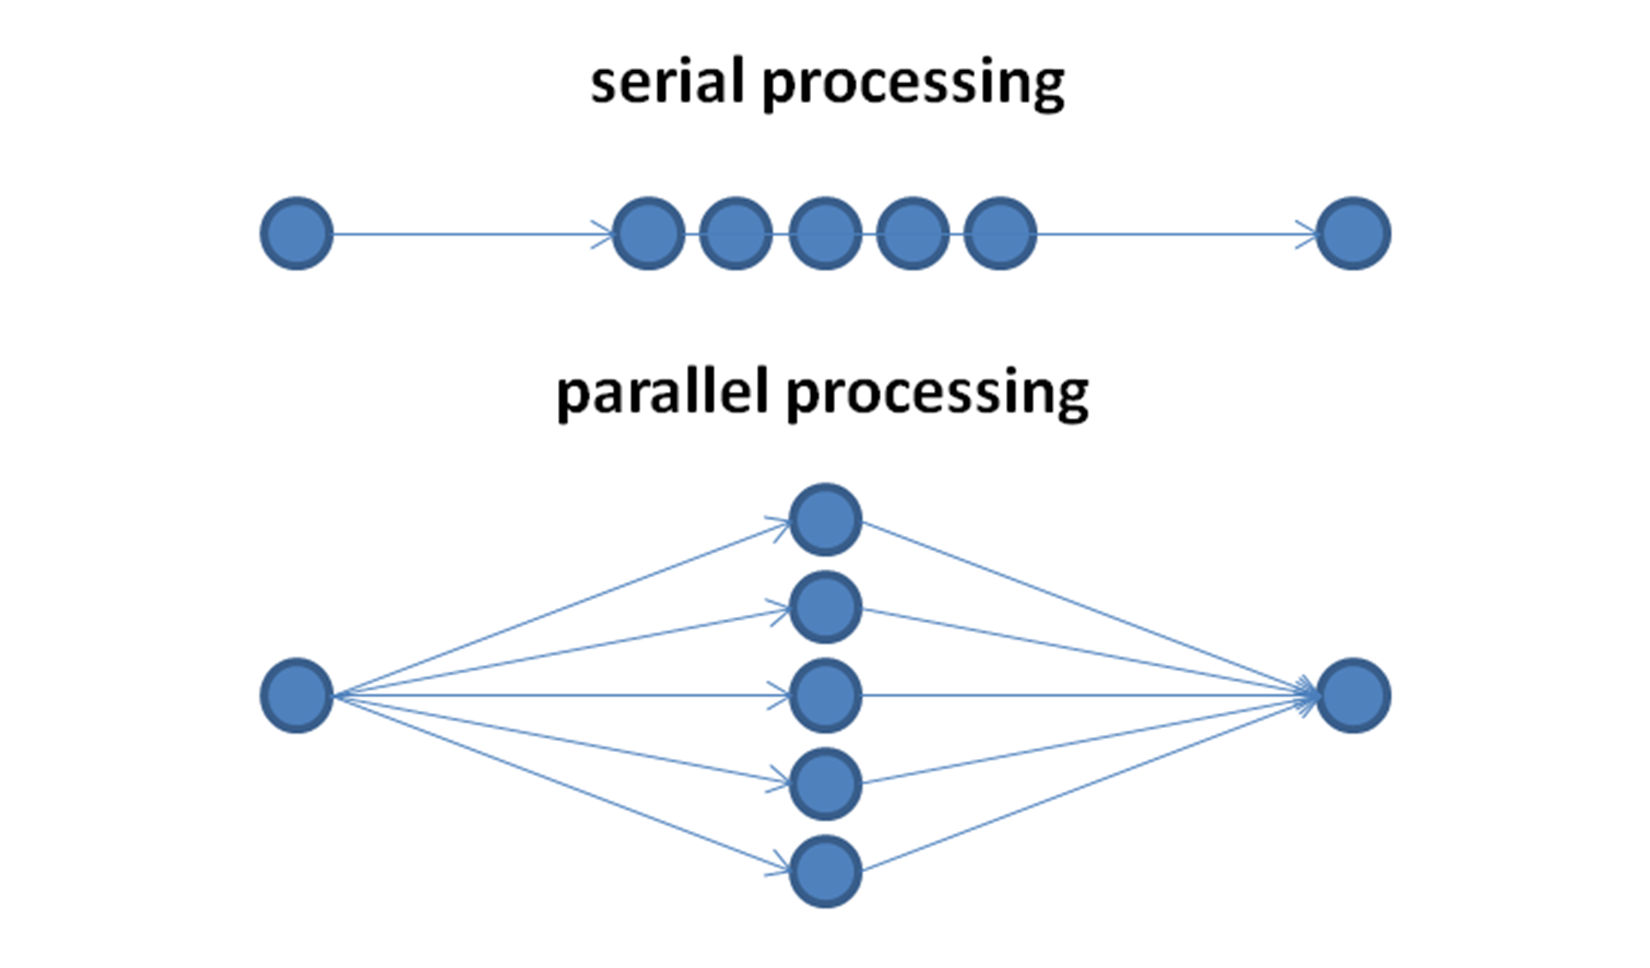

Grocery store example.

There are four main terms you need to know: **cores, nodes, partitions, cluster**

A **core** is the smallest unit of computation (tiny comptuers).

A **node** are multiple cores bundled together.

A **partition** is a collection of nodes.

A **cluster** is the collection of nodes.

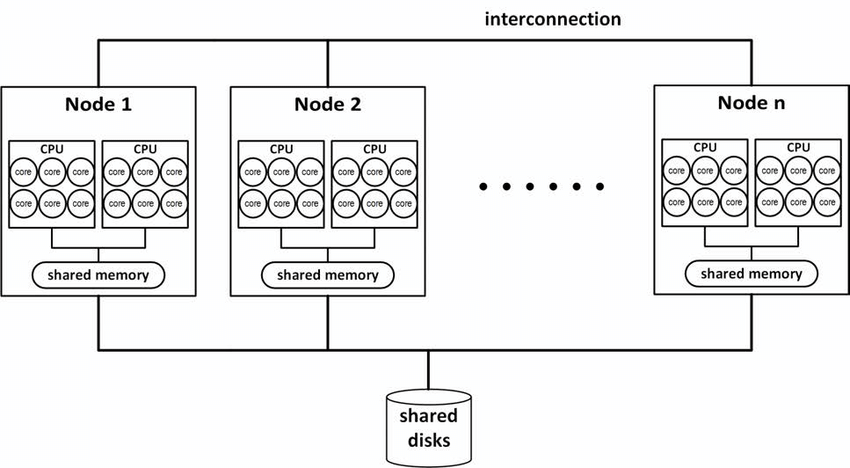

Midway2 has 3 partitions, 394 nodes, 11256 cores.

GPU's are also available if you need to look into that!

### Slurm

So we have a bunch of resources that researchers can use, but how are they allocated fairly? Well you'll remember that your PI applies for Service Units (related to Compute units) which are your 'bank' of time/energy. But what if a bunch of people request CPU's at the same time, or someone requests a huge amount? Midway uses a resource manager called Slurm to handle job allocations etc. you don't need to know much about it, but that word slurm will pop up every so often.

## Midway for research

### Midways-specific commands

`rcchelp`\
`rcchelp balance`\
`rcchelp usage`\
`squeue`\
`squeue --user=shorigan`\
`module avail`\
`module load`\
`module list`

### Python Virtual Environments

`module load python`\
`conda create -n day6_env`\
`conda activate day6_env`

you can create/add/reuse these environments, change versions, etc.

### Jupyter Notebook

`module load python`\
`/sbin/ip route get 8.8.8.8 | awk '{print $N$F;exit}'`\
`jupyter-notebook --no-browser --ip=128.135.112.68`

copy paste one of the links. Looks like a regular notebook but it's in Midway!

## Check In 5: can you access jupyter notebook from midway?

However, if you initiate a jupyter notebook or python environment from the login node, everything you run in the notebook is from the login node (aka no good). So how do we get off of the login node and onto a compute note?

### Jobs

There are two main ways that you can run jobs (i.e. code, scripts, computations) on midway, Interactive Jobs and Batch Jobs. They basically mean what they sound like. To learn about each, let's quickly write a short script that we can run on midway.

`touch day6.py`\
`nano day6.py`

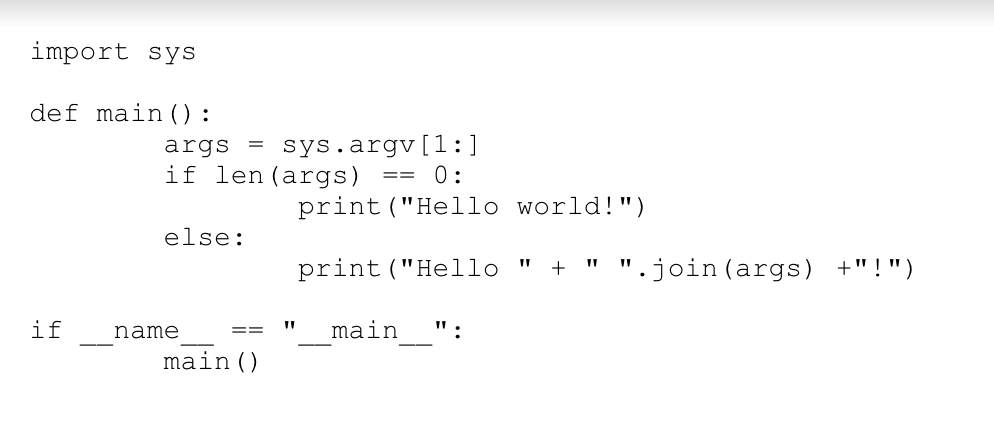

## Check in 5: have you finished writing your script?

### Interactive Jobs

An interactive job connects you to a compute node, and loads up an interactive shell environment for you to use on that compute node, either until you exit or you hit the maximum requested time.

To open an interactive job, use the command:\
`sinteractive` *default is 2 hours*

We only need about 5 minutes, which you can modify by using:\
`sinteractive --time=00:05:00`

and then we wait!

When you're in (who knows how long this takes), let's try running our code.

`python day6.py`\
`python day6.py Sophia`\
`python day6.py Sophia Horigan`

To exit early just type in `exit`.

### Batch Jobs

This is for jobs that you want to just 'send off', i.e. you don't need/want to interact with them, you just want to press go and get the output in return. 

Batch jobs are requested through use of an sbatch script, and the command `sbatch`. An sbatch script contains all of the commands and parameters necessary to run your job on the cluster. So instead of typing out one by one all of the commands of a job, slurm will just read the script and know what to do. Let's write a basic sbatch script together.

`touch day6.sbatch`\
`nano day5.sbatch`

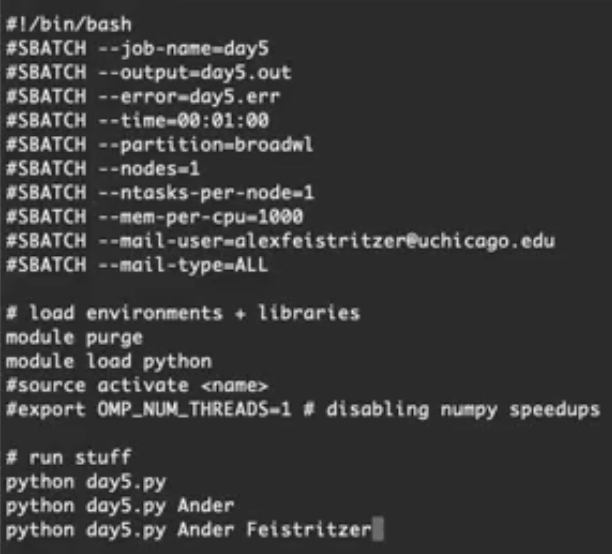

## Check in 7: have you finished writing your sbatch script?

`ls`\
`ls -l` *need execute permissions*\
`chmod +x day6.sbatch`\
`ls -l`\
`sbatch ./day6.sbatch`\
`squeue --user=shorigan`\

`scancel JOBID`\
`scance --user=shorigan`


## Check in 8: did your job run successfully?

## Resources

https://rcc.uchicago.edu/docs/running-jobs/index.html

https://rcc.uchicago.edu/docs/faq/index.html

https://rcc.uchicago.edu/support-and-services/workshops-and-training